In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
#import gseapy as gp
import os
#from gseapy.plot import barplot, dotplot
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from scipy.stats import linregress

import os
import  tarfile
import sys
from os import listdir
from os.path import isfile, join
import gzip

from IPython.display import clear_output

# PART A & B

In [3]:
df_geneCodes = pd.read_csv('/Users/Home/Desktop/Genomics/EnsembltoGeneID.txt', sep="\t")
df_geneCodes.head(10)

,Ensembl Gene ID,HGNC symbol
0,ENSG00000252303,RNU6-280P
1,ENSG00000281771,NaN
2,ENSG00000281256,NaN
3,ENSG00000283272,NaN
4,ENSG00000280864,NaN
5,ENSG00000280792,NaN
6,ENSG00000282878,NaN
7,ENSG00000283276,NaN
8,ENSG00000281822,RNU1-62P
9,ENSG00000281384,NaN


In [4]:
df_excel = pd.read_excel('/Users/Home/Desktop/Genomics/FileNameTCGAidTable.xlsx')
df_excelUpd = df_excel[["cases_0_samples_0_portions_0_analytes_0_aliquots_0_submitter_id", "file_name","cases_0_samples_0_sample_type","cases_0_submitter_id"]]

df_excelUpd = df_excelUpd.rename(columns={"file_name":"patient",'cases_0_submitter_id': 'Case'})

df_excelUpd['cases_0_samples_0_sample_type'] = df_excelUpd['cases_0_samples_0_sample_type'].str.split(' ')

df_excelUpd['cases_0_samples_0_sample_type'] = df_excelUpd['cases_0_samples_0_sample_type'].str[-1]
df_excelUpd = df_excelUpd.sort_values(by = ['Case'])
df_excelUpd

,cases_0_samples_0_portions_0_analytes_0_aliquots_0_submitter_id,patient,cases_0_samples_0_sample_type,Case
126,TCGA-02-0047-01A-01R-1849-01,9c10ea63-f990-4c9b-9149-df9583e59610.FPKM-UQ.t...,Tumor,TCGA-02-0047
261,TCGA-02-0055-01A-01R-1849-01,2556ce90-db5f-4beb-897a-db3cf556e054.FPKM-UQ.t...,Tumor,TCGA-02-0055
606,TCGA-02-2483-01A-01R-1849-01,19f1375f-51f2-4f4c-88fe-6fc84c37e5b6.FPKM-UQ.t...,Tumor,TCGA-02-2483
271,TCGA-02-2485-01A-01R-1849-01,1a860864-2ba1-46ad-ad36-018a7b0ec08e.FPKM-UQ.t...,Tumor,TCGA-02-2485
28,TCGA-02-2486-01A-01R-1849-01,38195109-056a-4a1f-997e-0f77e20b647b.FPKM-UQ.t...,Tumor,TCGA-02-2486
...,...,...,...,...
143,TCGA-WY-A85A-01A-21R-A36H-07,9bc967f6-6bf6-482b-b585-4ce1e5e73f5b.FPKM-UQ.t...,Tumor,TCGA-WY-A85A
671,TCGA-WY-A85B-01A-11R-A36H-07,7e0e2b5e-425e-43b1-b2a4-2ff04c6d0a7d.FPKM-UQ.t...,Tumor,TCGA-WY-A85B
136,TCGA-WY-A85C-01A-11R-A36H-07,49616e1a-59ed-4482-987b-4454fbdeb396.FPKM-UQ.t...,Tumor,TCGA-WY-A85C
60,TCGA-WY-A85D-01A-11R-A36H-07,2f0e3b6b-4ddd-4f53-82d9-1bf62a878c2c.FPKM-UQ.t...,Tumor,TCGA-WY-A85D


In [5]:
df_geneCodes = df_geneCodes.dropna()
df_geneCodes

,Ensembl Gene ID,HGNC symbol
0,ENSG00000252303,RNU6-280P
8,ENSG00000281822,RNU1-62P
12,ENSG00000281316,DPPA2P2
13,ENSG00000280963,SERTAD4-AS1
14,ENSG00000280775,RNA5SP136
...,...,...
63312,ENSG00000167754,KLK5
63315,ENSG00000129055,ANAPC13
63316,ENSG00000269335,IKBKG
63317,ENSG00000186474,KLK12


In [6]:
mmc2 = pd.read_excel(os.path.join('/Users/Home/Desktop/Genomics', 'mmc2.xlsx'), header=(1), dtype=str)
mmc2 = mmc2.filter(items=['Case', 'Grade', 'Age (years at diagnosis)', 
                                'Pan-Glioma DNA Methylation Cluster', 
                                'IDH-specific DNA Methylation Cluster'])

In [7]:
mmc2

,Case,Grade,Age (years at diagnosis),Pan-Glioma DNA Methylation Cluster,IDH-specific DNA Methylation Cluster
0,TCGA-CS-4938,G2,31,LGm2,IDHmut-K2
1,TCGA-CS-4941,G3,67,LGm5,IDHwt-K2
2,TCGA-CS-4942,G3,44,LGm2,IDHmut-K2
3,TCGA-CS-4943,G3,37,LGm2,IDHmut-K2
4,TCGA-CS-4944,G2,50,LGm2,IDHmut-K2
...,...,...,...,...,...
1117,TCGA-87-5896,G4,50,LGm4,IDHwt-K1
1118,TCGA-OX-A56R,G4,68,LGm5,IDHwt-K2
1119,TCGA-RR-A6KA,G4,72,LGm5,IDHwt-K2
1120,TCGA-RR-A6KB,NaN,NaN,LGm5,IDHwt-K2


In [8]:
GBM_path = '/Users/Home/Desktop/TCGA-GBM.htseq_fpkm-uq.tsv'

GBM_df = pd.read_csv(GBM_path, sep='\t')

In [9]:
GBM_df['Ensembl_ID'] = GBM_df['Ensembl_ID'].str.split('.')
GBM_df['Ensembl_ID'] = GBM_df['Ensembl_ID'].str[0]

In [10]:
GBM_df = GBM_df.T
GBM_df.columns = GBM_df.iloc[0]

In [11]:
GBM_df = GBM_df.iloc[1:]

In [12]:
GBM_df.reset_index(inplace =True)

In [13]:
df_GBM = GBM_df.rename(columns={'index':'Ensembl_ID'})

In [14]:
df_GBM['GBM_LGG'] = 'GBM'

In [15]:
df_GBM

Ensembl_ID,Ensembl_ID,ENSG00000242268,ENSG00000270112,ENSG00000167578,ENSG00000273842,ENSG00000078237,ENSG00000146083,ENSG00000225275,ENSG00000158486,ENSG00000198242,...,ENSG00000186115,ENSG00000216352,ENSG00000267117,ENSG00000273233,ENSG00000105063,ENSG00000231119,ENSG00000280861,ENSG00000123685,ENSG00000181518,GBM_LGG
0,TCGA-06-0878-01A,14.4829,10.8686,16.5716,0,17.3821,17.3415,0,8.32464,21.0315,...,9.8361,0,11.0831,12.1326,18.042,12.6312,0,16.6462,0,GBM
1,TCGA-26-5135-01A,12.0277,12.9647,16.7519,0,17.1072,18.1399,0,6.32638,21.3109,...,7.56727,0,11.9778,12.0277,18.7681,13.2632,0,18.0626,0,GBM
2,TCGA-06-5859-01A,12.0951,13.2342,17.0665,0,17.956,17.851,0,9.60636,20.9221,...,9.53588,0,0,10.8325,17.5588,13.1379,0,13.9422,0,GBM
3,TCGA-06-2563-01A,13.7561,10.618,17.0494,0,17.6243,17.4406,0,6.91144,21.94,...,0,0,12.7912,13.0337,18.5838,11.755,0,16.9588,0,GBM
4,TCGA-27-1834-01A,14.2543,8.65356,16.3343,0,16.8502,17.6389,0,9.19217,21.0822,...,11.8134,0,0,11.2369,18.0089,14.7648,0,15.2236,0,GBM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,TCGA-76-4932-01A,13.1811,13.3673,16.8056,0,17.49,17.198,0,0,21.8301,...,8.71663,0,9.96251,11.0117,18.2308,12.5688,0,17.9703,0,GBM
169,TCGA-08-0386-01A,13.927,9.78364,16.2322,0,15.9828,17.3426,0,8.10202,20.5914,...,11.6116,0,0,11.4944,18.0751,12.7298,0,14.1688,0,GBM
170,TCGA-06-0749-01A,14.2512,11.7017,18.1683,0,17.0493,17.4589,0,7.74525,21.7178,...,8.40915,0,12.238,12.6098,17.9658,15.4588,0,15.4369,0,GBM
171,TCGA-06-0139-01A,11.4633,10.1996,17.4304,0,18.0835,17.6967,0,8.07101,22.1871,...,9.31925,0,14.1499,0,17.9981,12.4357,0,16.3362,0,GBM


In [16]:
LGG_path = '/Users/Home/Desktop/TCGA-LGG.htseq_fpkm-uq.tsv'

LGG_df = pd.read_csv(LGG_path, sep='\t')

In [17]:
LGG_df['Ensembl_ID'] = LGG_df['Ensembl_ID'].str.split('.')
LGG_df['Ensembl_ID'] = LGG_df['Ensembl_ID'].str[0]

In [18]:
LGG_df = LGG_df.T
LGG_df.columns = LGG_df.iloc[0]

In [19]:
LGG_df = LGG_df.iloc[1:]

In [20]:
LGG_df.reset_index(inplace = True)

In [21]:
df_LGG = LGG_df.rename(columns={'index':'Ensembl_ID'})

In [22]:
df_LGG['GBM_LGG'] = 'LGG'

In [23]:
df_LGG

Ensembl_ID,Ensembl_ID,ENSG00000242268,ENSG00000270112,ENSG00000167578,ENSG00000273842,ENSG00000078237,ENSG00000146083,ENSG00000225275,ENSG00000158486,ENSG00000198242,...,ENSG00000186115,ENSG00000216352,ENSG00000267117,ENSG00000273233,ENSG00000105063,ENSG00000231119,ENSG00000280861,ENSG00000123685,ENSG00000181518,GBM_LGG
0,TCGA-S9-A6WQ-01A,11.5475,9.54753,17.1103,0,15.7087,17.8435,0,5.85311,21.6353,...,9.08196,0,9.91362,11.5475,18.2101,13.0854,0,15.2855,0,LGG
1,TCGA-DB-A64V-01A,12.9576,9.40972,17.5988,0,16.8072,17.4697,0,0,21.2766,...,7.12161,0,9.94551,9.99539,17.9064,12.8621,0,15.2772,0,LGG
2,TCGA-DU-8162-01A,11.6962,12.3247,16.7923,0,16.5993,17.8072,0,8.40247,20.1783,...,10.4441,0,0,11.211,18.6004,12.1244,0,14.2492,8.98469,LGG
3,TCGA-HT-7858-01A,12.3884,10.125,16.5183,0,16.0096,17.9277,0,6.2728,21.2429,...,7.92635,0,9.75491,9.80478,18.1568,11.6242,0,14.481,0,LGG
4,TCGA-DU-A5TU-01A,10.8593,8.42834,17.2139,0,17.9088,17.2765,0,7.20812,21.6359,...,10.129,0,9.96204,13.1806,18.1696,11.732,0,16.1044,0,LGG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,TCGA-VV-A829-01A,14.7173,12.0202,15.5389,0,16.1297,18.0881,0,7.16029,21.1354,...,9.08226,0,10.9132,10.9631,17.2991,12.6837,0,12.7179,0,LGG
525,TCGA-DH-A7UR-01A,14.3717,10.6676,16.6412,0,15.841,18.2027,0,8.43123,21.313,...,10.9787,0,11.3963,13.0308,17.7162,11.5823,0,14.1898,0,LGG
526,TCGA-HT-A616-01A,11.9831,12.9061,16.7259,0,15.6023,17.8365,0,7.8144,20.5195,...,11.2526,0,10.0861,11.7201,18.1019,11.219,0,14.7212,0,LGG
527,TCGA-TQ-A7RJ-01A,12.2963,9.71136,16.627,0,15.7074,18.0067,0,7.17193,20.3794,...,10.1515,0,12.2464,11.7115,18.0472,11.4327,0,14.9043,0,LGG


In [24]:
frames = [df_GBM, df_LGG]
GBM_LGG_df = pd.concat(frames)

In [25]:
GBM_LGG_df['Ensembl_ID'] = GBM_LGG_df['Ensembl_ID'].str[:-4]

In [26]:
GBM_LGG_df['A'] = GBM_LGG_df['Ensembl_ID']
GBM_LGG_df['B'] = GBM_LGG_df['Ensembl_ID']
GBM_LGG_df['C'] = GBM_LGG_df['Ensembl_ID']
GBM_LGG_df['D'] = GBM_LGG_df['Ensembl_ID']
GBM_LGG_df['E'] = GBM_LGG_df['Ensembl_ID']

In [27]:
replacement = df_excelUpd.set_index('Case')['cases_0_samples_0_sample_type']
GBM_LGG_df['A'] = GBM_LGG_df['A'].replace(replacement)

replacement = mmc2.set_index('Case')['Grade']
GBM_LGG_df['B'] = GBM_LGG_df['B'].replace(replacement)

replacement = mmc2.set_index('Case')['Age (years at diagnosis)']
GBM_LGG_df['C'] = GBM_LGG_df['C'].replace(replacement)

replacement = mmc2.set_index('Case')['Pan-Glioma DNA Methylation Cluster']
GBM_LGG_df['D'] = GBM_LGG_df['D'].replace(replacement)

replacement = mmc2.set_index('Case')['IDH-specific DNA Methylation Cluster']
GBM_LGG_df['E'] = GBM_LGG_df['E'].replace(replacement)

In [28]:
df_GBM_LGG = GBM_LGG_df.rename(columns={"A": "sample_type", "B": "Grade", "C": "Age (years at diagnosis)", "D": "Pan-Glioma DNA Methylation Cluster", "E": "IDH-specific DNA Methylation Cluster"})

In [29]:
df_GBM_LGG

Ensembl_ID,Ensembl_ID,ENSG00000242268,ENSG00000270112,ENSG00000167578,ENSG00000273842,ENSG00000078237,ENSG00000146083,ENSG00000225275,ENSG00000158486,ENSG00000198242,...,ENSG00000231119,ENSG00000280861,ENSG00000123685,ENSG00000181518,GBM_LGG,sample_type,Grade,Age (years at diagnosis),Pan-Glioma DNA Methylation Cluster,IDH-specific DNA Methylation Cluster
0,TCGA-06-0878,14.4829,10.8686,16.5716,0,17.3821,17.3415,0,8.32464,21.0315,...,12.6312,0,16.6462,0,GBM,Tumor,G4,74,LGm5,IDHwt-K2
1,TCGA-26-5135,12.0277,12.9647,16.7519,0,17.1072,18.1399,0,6.32638,21.3109,...,13.2632,0,18.0626,0,GBM,Tumor,G4,72,LGm5,IDHwt-K2
2,TCGA-06-5859,12.0951,13.2342,17.0665,0,17.956,17.851,0,9.60636,20.9221,...,13.1379,0,13.9422,0,GBM,Tumor,G4,63,LGm4,IDHwt-K1
3,TCGA-06-2563,13.7561,10.618,17.0494,0,17.6243,17.4406,0,6.91144,21.94,...,11.755,0,16.9588,0,GBM,Tumor,G4,72,LGm4,IDHwt-K1
4,TCGA-27-1834,14.2543,8.65356,16.3343,0,16.8502,17.6389,0,9.19217,21.0822,...,14.7648,0,15.2236,0,GBM,Tumor,G4,56,LGm5,IDHwt-K2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,TCGA-VV-A829,14.7173,12.0202,15.5389,0,16.1297,18.0881,0,7.16029,21.1354,...,12.6837,0,12.7179,0,LGG,Tumor,G3,44,LGm3,IDHmut-K3
525,TCGA-DH-A7UR,14.3717,10.6676,16.6412,0,15.841,18.2027,0,8.43123,21.313,...,11.5823,0,14.1898,0,LGG,Tumor,G3,59,LGm3,IDHmut-K3
526,TCGA-HT-A616,11.9831,12.9061,16.7259,0,15.6023,17.8365,0,7.8144,20.5195,...,11.219,0,14.7212,0,LGG,Tumor,G2,36,LGm2,IDHmut-K2
527,TCGA-TQ-A7RJ,12.2963,9.71136,16.627,0,15.7074,18.0067,0,7.17193,20.3794,...,11.4327,0,14.9043,0,LGG,Tumor,NaN,NaN,LGm2,IDHmut-K2


In [30]:
df_GBM_tumor=df_GBM_LGG.where(df_GBM_LGG['GBM_LGG']=='GBM').where(df_GBM_LGG['sample_type']=='Tumor').dropna(how='all')
df_LGG_tumor=df_GBM_LGG.where(df_GBM_LGG['GBM_LGG']=='LGG').where(df_GBM_LGG['sample_type']=='Tumor').dropna(how='all')

In [31]:
df_normal=df_GBM_LGG.where(df_GBM_LGG['sample_type']=='Normal').dropna(how='all')

In [32]:
df_LGm123_G23 = df_GBM_LGG.where(df_GBM_LGG['Pan-Glioma DNA Methylation Cluster'].str.contains('LGm1|LGm2|LGm3')
                               ).where(df_GBM_LGG['Grade'].str.contains('G2|G3')
                                      ).dropna(how='all')
df_LGm123_G4 = df_GBM_LGG.where(df_GBM_LGG['Pan-Glioma DNA Methylation Cluster'].str.contains('LGm1|LGm2|LGm3')
                              ).where(df_GBM_LGG['Grade'].str.contains('G4')
                                     ).dropna(how='all')

In [33]:
df_LGm456_G23 = df_GBM_LGG.where(df_GBM_LGG['Pan-Glioma DNA Methylation Cluster'].str.contains('LGm4|LGm5|LGm6')
                               ).where(df_GBM_LGG['Grade'].str.contains('G2|G3')
                                      ).dropna(how='all')
df_LGm456_G4 = df_GBM_LGG.where(df_GBM_LGG['Pan-Glioma DNA Methylation Cluster'].str.contains('LGm4|LGm5|LGm6')
                              ).where(df_GBM_LGG['Grade'].str.contains('G4')
                                     ).dropna(how='all')

In [34]:
df_GBM_tumor_dr =df_GBM_tumor.drop(columns=['GBM_LGG', 'sample_type','Grade','Age (years at diagnosis)','Pan-Glioma DNA Methylation Cluster','IDH-specific DNA Methylation Cluster'])
df_LGG_tumor_dr =df_LGG_tumor.drop(columns=['GBM_LGG', 'sample_type','Grade','Age (years at diagnosis)','Pan-Glioma DNA Methylation Cluster','IDH-specific DNA Methylation Cluster'])
df_normal_dr =df_normal.drop(columns=['GBM_LGG', 'sample_type','Grade','Age (years at diagnosis)','Pan-Glioma DNA Methylation Cluster','IDH-specific DNA Methylation Cluster'])


df_LGm123_G23_dr =df_LGm123_G23.drop(columns=['GBM_LGG', 'sample_type','Grade','Age (years at diagnosis)','Pan-Glioma DNA Methylation Cluster','IDH-specific DNA Methylation Cluster'])
df_LGm123_G4_dr =df_LGm123_G4.drop(columns=['GBM_LGG', 'sample_type','Grade','Age (years at diagnosis)','Pan-Glioma DNA Methylation Cluster','IDH-specific DNA Methylation Cluster'])

df_LGm456_G23_dr =df_LGm456_G23.drop(columns=['GBM_LGG', 'sample_type','Grade','Age (years at diagnosis)','Pan-Glioma DNA Methylation Cluster','IDH-specific DNA Methylation Cluster'])
df_LGm456_G4_dr =df_LGm456_G4.drop(columns=['GBM_LGG', 'sample_type','Grade','Age (years at diagnosis)','Pan-Glioma DNA Methylation Cluster','IDH-specific DNA Methylation Cluster'])


In [35]:
df_GBM_tumor_dr = df_GBM_tumor_dr.rename(columns={'Ensembl_ID':'Patients'}).set_index('Patients').astype(np.float32)
df_LGG_tumor_dr = df_LGG_tumor_dr.rename(columns={'Ensembl_ID':'Patients'}).set_index('Patients').astype(np.float32)
df_normal_dr = df_normal_dr.rename(columns={'Ensembl_ID':'Patients'}).set_index('Patients').astype(np.float32)

df_LGm123_G23_dr = df_LGm123_G23_dr.rename(columns={'Ensembl_ID':'Patients'}).set_index('Patients').astype(np.float32)
df_LGm123_G4_dr = df_LGm123_G4_dr.rename(columns={'Ensembl_ID':'Patients'}).set_index('Patients').astype(np.float32)

df_LGm456_G23_dr = df_LGm456_G23_dr.rename(columns={'Ensembl_ID':'Patients'}).set_index('Patients').astype(np.float32)
df_LGm456_G4_dr = df_LGm456_G4_dr.rename(columns={'Ensembl_ID':'Patients'}).set_index('Patients').astype(np.float32)

In [36]:
ttest_GBM = stats.ttest_ind(df_GBM_tumor_dr.T, df_normal_dr.T, axis=1)

C:\Users\Home\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Home\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Home\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [37]:
ttest_LGG = stats.ttest_ind(df_LGG_tumor_dr.T, df_normal_dr.T, axis=1)

In [38]:
ttest_LGm123 = stats.ttest_ind(df_LGm123_G23_dr.T, df_LGm123_G4_dr.T, axis=1)

In [39]:
ttest_LGm456 = stats.ttest_ind(df_LGm456_G23_dr.T, df_LGm456_G4_dr.T, axis=1)

In [40]:
df_ttest_GBM = pd.DataFrame([ttest_GBM.statistic, ttest_GBM.pvalue], columns=df_GBM_tumor_dr.T.index, index=['statistic','pvalue']).transpose().dropna()
df_ttest_LGG = pd.DataFrame([ttest_LGG.statistic, ttest_LGG.pvalue], columns=df_LGG_tumor_dr.T.index, index=['statistic','pvalue']).transpose().dropna()
df_ttest_LGm123 = pd.DataFrame([ttest_LGm123.statistic, ttest_LGm123.pvalue], columns=df_LGm123_G23_dr.T.index, index=['statistic','pvalue']).transpose().dropna()
df_ttest_LGm456 = pd.DataFrame([ttest_LGm456.statistic, ttest_LGm456.pvalue], columns=df_LGm456_G23_dr.T.index, index=['statistic','pvalue']).transpose().dropna()

df_ttest_GBM = df_ttest_GBM.sort_values(by='pvalue').head(20)
df_ttest_LGG = df_ttest_LGG.sort_values(by='pvalue').head(20)
df_ttest_LGm123 = df_ttest_LGm123.sort_values(by='pvalue').head(20)
df_ttest_LGm456 = df_ttest_LGm456.sort_values(by='pvalue').head(20)


In [41]:
df_ttest_GBM['group'] = "GBM"
df_ttest_GBM

,statistic,pvalue,group
Ensembl_ID,,,
ENSG00000250568,42.435112,1.037086e-92,GBM
ENSG00000231878,38.591652,2.529230e-86,GBM
ENSG00000213867,36.350498,2.322285e-82,GBM
ENSG00000228938,36.007061,9.770227e-82,GBM
ENSG00000253173,35.575951,6.021311e-81,GBM
ENSG00000249921,35.259453,2.313003e-80,GBM
ENSG00000237730,34.064468,4.049574e-78,GBM
ENSG00000224953,33.229431,1.621996e-76,GBM
ENSG00000213774,32.872074,8.034663e-76,GBM


In [42]:
df_ttest_LGG['group'] = "LGG"
df_ttest_LGG

,statistic,pvalue,group
Ensembl_ID,,,
ENSG00000264458,12.250238,1.442074e-30,LGG
ENSG00000244024,-11.736296,1.907397e-28,LGG
ENSG00000274381,-11.478444,2.114221e-27,LGG
ENSG00000253078,-11.478444,2.114221e-27,LGG
ENSG00000207984,-11.478443,2.114240e-27,LGG
ENSG00000250760,-11.478443,2.114240e-27,LGG
ENSG00000276651,10.682230,2.900863e-24,LGG
ENSG00000249731,-9.502851,6.934758e-20,LGG
ENSG00000212219,-9.474429,8.755650e-20,LGG


In [43]:
df_ttest_LGm123

,statistic,pvalue
Ensembl_ID,,
ENSG00000210195,29.315702,5.185715e-100
ENSG00000279274,-22.844934,1.450196e-73
ENSG00000235386,-18.338772,2.096061e-54
ENSG00000276924,-16.319139,7.475971e-46
ENSG00000234664,-15.418327,4.337052e-42
ENSG00000279211,-14.942930,4.019934e-40
ENSG00000250847,-14.395457,7.072160e-38
ENSG00000234009,-14.299919,1.733632e-37
ENSG00000231622,-14.246181,2.868497e-37


In [44]:
df_ttest_LGm456

,statistic,pvalue
Ensembl_ID,,
ENSG00000213763,-44.486168,3.146218e-108
ENSG00000234009,-42.184978,6.593981e-104
ENSG00000205609,-41.581478,9.626330e-103
ENSG00000229132,-41.031200,1.139555e-101
ENSG00000279274,-40.357784,2.429874e-100
ENSG00000230629,-40.117188,7.320241e-100
ENSG00000213553,-39.719223,4.587944e-99
ENSG00000272196,-39.487568,1.344117e-98
ENSG00000235787,-39.017330,1.209249e-97


# PART C

In [45]:
df_LGm123 = df_GBM_LGG.where(df_GBM_LGG['Pan-Glioma DNA Methylation Cluster'].str.contains('LGm1|LGm2|LGm3')).dropna(how='all')
df_LGm456 = df_GBM_LGG.where(df_GBM_LGG['Pan-Glioma DNA Methylation Cluster'].str.contains('LGm4|LGm5|LGm6')).dropna(how='all')

df_LGm123_age = df_LGm123.drop(columns=['GBM_LGG', 'sample_type','Grade', 'Pan-Glioma DNA Methylation Cluster',
                                                'IDH-specific DNA Methylation Cluster'])
df_LGm456_age = df_LGm456.drop(columns=['GBM_LGG', 'sample_type','Grade', 'Pan-Glioma DNA Methylation Cluster',
                                                'IDH-specific DNA Methylation Cluster'])

df_LGm123_age = df_LGm123_age.rename(columns={'Ensembl_ID':'Patients'}).set_index('Patients').astype(np.float32).dropna()
df_LGm456_age = df_LGm456_age.rename(columns={'Ensembl_ID':'Patients'}).set_index('Patients').astype(np.float32).dropna()


In [46]:
df_LGm456

Ensembl_ID,Ensembl_ID,ENSG00000242268,ENSG00000270112,ENSG00000167578,ENSG00000273842,ENSG00000078237,ENSG00000146083,ENSG00000225275,ENSG00000158486,ENSG00000198242,...,ENSG00000231119,ENSG00000280861,ENSG00000123685,ENSG00000181518,GBM_LGG,sample_type,Grade,Age (years at diagnosis),Pan-Glioma DNA Methylation Cluster,IDH-specific DNA Methylation Cluster
0,TCGA-06-0878,14.4829,10.8686,16.5716,0,17.3821,17.3415,0,8.32464,21.0315,...,12.6312,0,16.6462,0,GBM,Tumor,G4,74,LGm5,IDHwt-K2
1,TCGA-26-5135,12.0277,12.9647,16.7519,0,17.1072,18.1399,0,6.32638,21.3109,...,13.2632,0,18.0626,0,GBM,Tumor,G4,72,LGm5,IDHwt-K2
2,TCGA-06-5859,12.0951,13.2342,17.0665,0,17.956,17.851,0,9.60636,20.9221,...,13.1379,0,13.9422,0,GBM,Tumor,G4,63,LGm4,IDHwt-K1
3,TCGA-06-2563,13.7561,10.618,17.0494,0,17.6243,17.4406,0,6.91144,21.94,...,11.755,0,16.9588,0,GBM,Tumor,G4,72,LGm4,IDHwt-K1
4,TCGA-27-1834,14.2543,8.65356,16.3343,0,16.8502,17.6389,0,9.19217,21.0822,...,14.7648,0,15.2236,0,GBM,Tumor,G4,56,LGm5,IDHwt-K2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,TCGA-FG-A70Z,10.8752,13.2346,17.1252,0,17.3235,17.4308,0,7.07302,20.8861,...,13.6127,0,15.8413,0,LGG,Tumor,G3,53,LGm5,IDHwt-K2
513,TCGA-HT-7469,16.5193,13.9223,15.6021,0,16.8093,17.5133,10.1802,6.4661,21.0783,...,10.6683,0,13.1984,0,LGG,Tumor,G3,30,LGm6,IDHwt-K3
517,TCGA-HT-A5RC,14.5809,10.0698,16.5622,0,17.1824,17.8354,0,7.2671,20.2336,...,12.9838,0,16.2785,0,LGG,Tumor,G3,70,LGm4,IDHwt-K1
518,TCGA-FG-6692,13.9871,7.72939,17.649,0,17.1209,17.0399,0,6.60477,21.0257,...,13.0641,0,18.1157,0,LGG,Tumor,G3,63,LGm4,IDHwt-K1


In [47]:
genes=[]
pvalues=[]

for i in range (1,len(df_LGm123_age.columns)):
    X = df_LGm123_age.iloc[:,-1:] #age
    y = df_LGm123_age.iloc[:,i-1:i] #genes
    X2 = sm.add_constant(X) 
    est = sm.OLS(y, X2)
    est2 = est.fit()
    pvalues.append(est2.pvalues[1])
    genes.append(y.columns[0])
    

C:\Users\Home\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Home\Anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


In [48]:
genes_456=[]
pvalues_456=[]

for i_456 in range (1,len(df_LGm456_age.columns)):
    X_456 = df_LGm456_age.iloc[:,-1:] #age
    y_456 = df_LGm456_age.iloc[:,i_456-1:i_456] #genes
    X2_456 = sm.add_constant(X_456) 
    est_456 = sm.OLS(y_456, X2_456)
    est2_456 = est_456.fit()
    pvalues_456.append(est2_456.pvalues[1])
    genes_456.append(y_456.columns[0])

In [49]:
df_LGm123_age_pvalues = pd.DataFrame()
df_LGm123_age_pvalues ['genes'] = genes
df_LGm123_age_pvalues ['pvalues'] = pvalues
df_LGm123_age_pvalues['group'] = 'LGm123'

df_LGm456_age_pvalues = pd.DataFrame()
df_LGm456_age_pvalues ['genes'] = genes_456
df_LGm456_age_pvalues ['pvalues'] = pvalues_456
df_LGm456_age_pvalues['group'] = 'LGm456'

df_LGm123_age_pvalues = df_LGm123_age_pvalues.sort_values(by='pvalues').head(20).reset_index().drop(['index'], axis=1)
df_LGm456_age_pvalues = df_LGm456_age_pvalues.sort_values(by='pvalues').head(20).reset_index().drop(['index'], axis=1)

dataframes = [df_LGm123_age_pvalues, df_LGm456_age_pvalues]
df_LGm123_LGm456_age = pd.concat(dataframes).reset_index().drop(['index'], axis=1)#.set_index('genes')

replacement = df_geneCodes.set_index('Ensembl Gene ID')['HGNC symbol']
df_LGm123_age_pvalues['genes'] = df_LGm123_age_pvalues['genes'].replace(replacement)
df_LGm123_age_pvalues = df_LGm123_age_pvalues.set_index('genes')

replacement2 = df_geneCodes.set_index('Ensembl Gene ID')['HGNC symbol']
df_LGm456_age_pvalues['genes'] = df_LGm456_age_pvalues['genes'].replace(replacement2)
df_LGm456_age_pvalues = df_LGm456_age_pvalues.set_index('genes')

In [50]:
df_LGm123_age_pvalues

,pvalues,group
genes,,
CYFIP1,9.217866e-19,LGm123
TBX5,4.228365e-18,LGm123
KCTD12,8.831463e-18,LGm123
PAX5,1.927688e-17,LGm123
FCRLB,2.467831e-17,LGm123
HK2,4.725203e-17,LGm123
SIM2,1.982886e-16,LGm123
RREB1,2.588710e-16,LGm123
SYT6,2.841517e-16,LGm123


In [51]:
df_LGm456_age_pvalues

,pvalues,group
genes,,
SHOX2,1.125124e-12,LGm456
HOXA3,1.929447e-12,LGm456
TERT,4.902126e-12,LGm456
HOXA4,2.269611e-11,LGm456
HOXA5,2.370140e-11,LGm456
CCZ1B,2.467328e-11,LGm456
BTRC,2.632335e-11,LGm456
OTP,2.833205e-11,LGm456
WARS2-IT1,3.315328e-11,LGm456


In [53]:
dict_w

{'LGm123': 'p', 'LGm456': 'P'}

In [54]:
df_LGm123_LGm456_age

,genes,pvalues,group
0,ENSG00000273749,9.217866e-19,LGm123
1,ENSG00000089225,4.228365e-18,LGm123
2,ENSG00000178695,8.831463e-18,LGm123
3,ENSG00000196092,1.927688e-17,LGm123
4,ENSG00000162746,2.467831e-17,LGm123
5,ENSG00000159399,4.725203e-17,LGm123
6,ENSG00000159263,1.982886e-16,LGm123
7,ENSG00000124782,2.588710e-16,LGm123
8,ENSG00000134207,2.841517e-16,LGm123
9,ENSG00000144366,1.066277e-15,LGm123


In [55]:
df_LGm123['lower_higher'] = "LGm123"
df_LGm456['lower_higher'] = "LGm456"

In [56]:
dataframes = [df_LGm123, df_LGm456]
df_pca = pd.concat(dataframes).reset_index().drop(['index'], axis=1)

In [87]:
df_pca_genes = df_pca.T
df_pca_genes['genes'] = df_pca.columns

In [88]:
df_pca_genes

,0,1,2,3,4,5,6,7,8,9,...,650,651,652,653,654,655,656,657,658,genes
Ensembl_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000159263,12.8335,16.305,16.818,13.3554,15.7975,15.809,15.5092,12.9711,15.3565,13.0337,...,15.3282,13.076,13.3108,12.665,15.7698,13.1918,13.1415,15.3564,14.2349,ENSG00000159263
ENSG00000225605,0,0,9.91348,0,0,0,11.3179,0,0,0,...,0,10.5929,10.2851,0,0,9.79266,0,11.9316,0,ENSG00000225605
ENSG00000241891,0,0,0,0,0,0,0,9.2933,0,0,...,9.01137,0,0,0,0,0,0,0,0,ENSG00000241891
ENSG00000254595,15.3129,14.7287,15.2073,16.0428,13.463,15.3318,14.9774,14.9003,13.9743,16.2405,...,16.0867,15.1893,16.1838,15.5377,15.9353,16.0462,15.9524,16.5523,15.1555,ENSG00000254595
ENSG00000233014,0,0,8.60711,0,0,0,0,0,0,0,...,9.98291,0,0,0,0,8.48649,0,8.6263,0,ENSG00000233014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Grade,G4,G4,G4,G4,G4,G4,G4,G4,G4,G2,...,G3,G2,G2,G3,G3,G3,G3,G3,G3,Grade
Age (years at diagnosis),45,21,30,43,43,60,59,21,34,57,...,55,66,33,48,53,30,70,63,23,Age (years at diagnosis)
Pan-Glioma DNA Methylation Cluster,LGm1,LGm1,LGm1,LGm2,LGm1,LGm1,LGm1,LGm2,LGm1,LGm2,...,LGm5,LGm5,LGm6,LGm4,LGm5,LGm6,LGm4,LGm4,LGm6,Pan-Glioma DNA Methylation Cluster


In [99]:
#GBM_LGG
#sample_type
df_pca_droped = df_pca_genes.where(df_pca_genes['genes'].str.contains('sample_type|GBM_LGG|lower_higher|IDH-specific DNA Methylation Cluster|Pan-Glioma DNA Methylation Cluster|Age (years at diagnosis)|Grade|ENSG00000273749|ENSG00000089225|ENSG00000178695|ENSG00000196092|ENSG00000162746|ENSG00000159399|ENSG00000159263|ENSG00000124782|ENSG00000134207|ENSG00000144366|ENSG00000236830|ENSG00000185033|ENSG00000176624|ENSG00000164251|ENSG00000184371|ENSG00000109790|ENSG00000178163|ENSG00000213516|ENSG00000118707|ENSG00000091986|ENSG00000168779|ENSG00000105997|ENSG00000164362|ENSG00000197576|ENSG00000106004|ENSG00000146574|ENSG00000166167|ENSG00000171540|ENSG00000224238|ENSG00000108061|ENSG00000107669|ENSG00000205795|ENSG00000257017|ENSG00000148690|ENSG00000105996|ENSG00000198954|ENSG00000128713|ENSG00000230362|ENSG00000180543|ENSG00000174279')).dropna(how='all')

In [121]:
df_pca_ready = df_pca_droped.drop(['genes'], axis=1).T

In [122]:
df_pca_ready

Ensembl_ID,ENSG00000159263,ENSG00000205795,ENSG00000185033,ENSG00000197576,ENSG00000144366,ENSG00000178695,ENSG00000257017,ENSG00000224238,ENSG00000236830,ENSG00000174279,...,ENSG00000159399,ENSG00000105996,ENSG00000171540,ENSG00000273749,GBM_LGG,sample_type,Grade,Pan-Glioma DNA Methylation Cluster,IDH-specific DNA Methylation Cluster,lower_higher
0,12.8335,10.2609,18.7509,13.4239,15.9747,17.6972,12.657,14.8559,11.0113,10.6986,...,17.6807,11.4722,10.9377,16.5958,GBM,Tumor,G4,LGm1,IDHmut-K1,LGm123
1,16.305,13.5871,18.3651,16.8333,15.2354,19.1338,11.4463,13.8376,12.1882,8.72465,...,19.0353,16.4667,11.497,19.3914,GBM,Tumor,G4,LGm1,IDHmut-K1,LGm123
2,16.818,13.1141,17.1768,16.0525,15.6816,19.2034,10.2105,14.3736,12.4703,10.5731,...,17.866,16.2342,13.8353,19.3508,GBM,Tumor,G4,LGm1,IDHmut-K1,LGm123
3,13.3554,14.7584,18.6497,10.9401,12.8273,18.5054,10.0118,13.0237,11.7516,12.531,...,17.0471,10.2553,10.498,18.2671,GBM,Tumor,G4,LGm2,IDHmut-K2,LGm123
4,15.7975,14.1842,17.3211,16.3939,13.5927,18.4364,10.5598,14.0881,12.5217,12.0264,...,17.9571,13.3963,13.3752,18.4149,GBM,Tumor,G4,LGm1,IDHmut-K1,LGm123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,15.7698,15.9126,17.7687,16.2794,12.0556,18.8063,17.2759,12.1454,13.0748,11.2164,...,16.9317,15.7231,15.8243,18.9497,LGG,Tumor,G3,LGm5,IDHwt-K2,LGm456
655,13.1918,13.5438,17.3575,13.5703,17.4196,19.1291,6.93031,14.7531,12.6123,15.7871,...,15.3945,14.3499,10.0074,18.9313,LGG,Tumor,G3,LGm6,IDHwt-K3,LGm456
656,13.1415,13.7389,17.783,10.6198,11.8114,20.0943,13.3704,13.3199,12.388,0,...,16.8652,10.5423,13.3287,19.2726,LGG,Tumor,G3,LGm4,IDHwt-K1,LGm456
657,15.3564,11.6278,17.8639,12.1478,14.1127,18.9425,19.452,13.6792,11.8051,11.4664,...,16.7428,13.003,14.8585,18.3776,LGG,Tumor,G3,LGm4,IDHwt-K1,LGm456


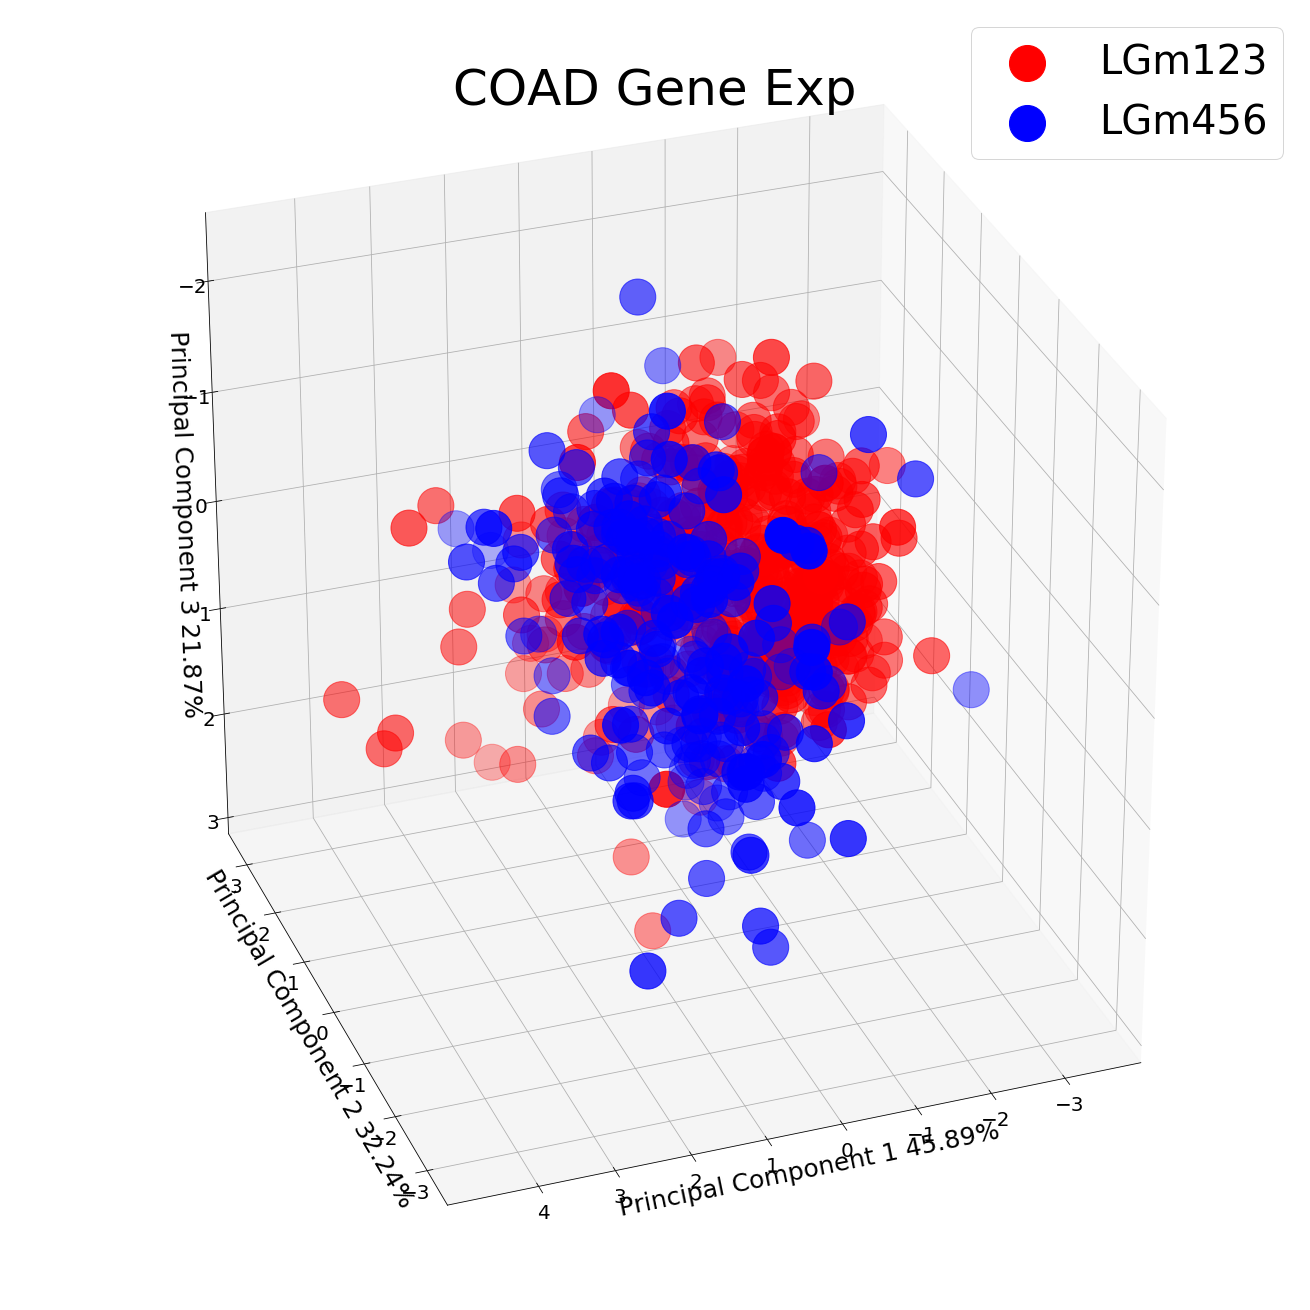

In [145]:
df_pca_ready_numeric = df_pca_ready.iloc[:,:-6].astype(np.float32)._get_numeric_data().iloc[:,:3]

dict_w = dict(zip(df_pca_ready.lower_higher.unique(), ["p", "P"]))

first_d = StandardScaler().fit_transform(df_pca_ready_numeric)

pca = PCA()

principalComponents = pca.fit_transform(first_d)

principalDf = pd.DataFrame(data = principalComponents, columns = ['pca1','pca2','pca3'])


finalDf = pd.concat([principalDf, df_pca_ready[["lower_higher",'sample_type', "GBM_LGG"]]], axis = 1)
fig = plt.figure(figsize = (18,18))
#fig = plt.figure(figsize = (8,18))
ax = Axes3D(fig, elev=-150, azim=110)
ax.set_xlabel('Principal Component 1 ' + "{0:.2f}%".format(list(pca.explained_variance_ratio_)[0]*100), fontsize = 25)
ax.set_ylabel('Principal Component 2 ' + "{0:.2f}%".format(list(pca.explained_variance_ratio_)[1]*100), fontsize = 25)
ax.set_zlabel('Principal Component 3 ' + "{0:.2f}%".format(list(pca.explained_variance_ratio_)[2]*100), fontsize = 25)
ax.set_title('{name} Gene Exp'.format(name="COAD"), fontsize = 50)


for target_t, color in zip(list(df_pca_ready.lower_higher.unique()), "rbgy"):
    indicesToKeep = finalDf['lower_higher'] == target_t
    ax.scatter(finalDf.loc[indicesToKeep, 'pca1']
               , finalDf.loc[indicesToKeep, 'pca2']
               , finalDf.loc[indicesToKeep, 'pca3']
              , c = color
              , s=[1300])

'''
for target_t, color, marker in zip(df_pca_ready.sample_type.unique(), "rbgy", "Po"):
    w_list = []
    indicesToKeep = finalDf['sample_type'] == target_t
    for i in finalDf[indicesToKeep].sample_type:
        w_list.append(dict_w[i])
    ax.scatter(finalDf.loc[indicesToKeep, 'pca1']
               , finalDf.loc[indicesToKeep, 'pca2']
               , finalDf.loc[indicesToKeep, 'pca3']
              , c = color 
              , marker = marker
              , s= [2000])'''

ax.legend(df_pca_ready.lower_higher.unique(),prop={'size': 40})
plt.tick_params(labelsize=20)
ax.grid()